<a href="https://colab.research.google.com/github/sourjeet/Game-of-Deep-Learning/blob/master/FastAI_ResNet50_Vanilla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()

  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
Successfully built gputil
Gen RAM Free: 12.9 GB  | Proc size: 119.9 MB
GPU RAM Free: 15079MB | Used: 0MB | Util   0% | Total 15079MB


In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
import gc
from pathlib import Path


from sklearn.metrics import accuracy_score
from IPython.display import FileLink

In [0]:
from fastai import *
from fastai.vision import *
from fastai.callbacks import *

In [4]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ln -s "drive/My Drive/ColabNotebooks/GameOfDL" "/content/GameOfDL"

In [6]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [0]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import collections

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [8]:
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [0]:
def augment_data( generator, X1, y, batch_size = 32 ):
    generator_seed = np.random.randint( 9999 )
    gen_X1 = generator.flow( X1, y, batch_size = BATCH_SIZE, seed = generator_seed )

    while True:
        X1i = gen_X1.next()

        yield  X1i[0], X1i[1]

In [0]:
def resize_data(data):
    
    rSz_data = np.array(data)
    #rSz_data = rSz_data.astype('float16')
    rSz_data /= 255
    
    return rSz_data
   

In [0]:
# Display one image
def display_one(a, title1 = "Original"):
    plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.show()

In [0]:
train = pd.read_csv("GameOfDL/Data/train.csv")
test = pd.read_csv("GameOfDL/Data/test.csv")

In [0]:
def readImages(df):
    
    img_rows=224
    img_cols=224

    img_data_list=[]
    count = 0
    
    for fileName in df['image']:
        
        input_img = cv2.imread("GameOfDL/Data/images/"+ fileName)
        input_img_resize = cv2.resize(input_img,(img_rows, img_cols))            
        img_data_list.append(input_img_resize)
        
        count +=1
        if count % 100 == 0:
          print(count)
          
    del input_img,input_img_resize, count, fileName, df
        
    return img_data_list

In [18]:
trainImages = readImages(train)
testImages  = readImages(test)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600


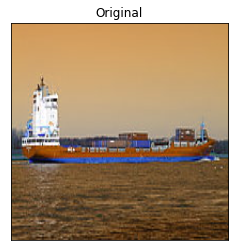

In [19]:
display_one(trainImages[0])

In [0]:
arrTrainImages = np.array(trainImages) 
arrTestImages = np.array(testImages) 

In [21]:
train['category'] = train['category'] - 1
train['category'] = train['category'].astype('object')
collections.Counter(train['category'])



Counter({0: 2120, 1: 1167, 2: 916, 3: 832, 4: 1217})

In [22]:
numClasses = len(train['category'].unique())
classes = to_categorical(train['category'], numClasses)
print(classes)

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0.]]


In [23]:
printm()

Gen RAM Free: 7.6 GB  | Proc size: 6.6 GB
GPU RAM Free: 15079MB | Used: 0MB | Util   0% | Total 15079MB


In [25]:
X_train, X_test, y_train, y_test = train_test_split(arrTrainImages, classes, test_size=0.2, random_state=2)
y_train.shape

(5001, 5)

In [0]:
train_il = ImageList.from_df(df=train, cols='image', path='GameOfDL/Data/images/')
test_il = ImageList.from_df(df=test, cols='image', path='GameOfDL/Data/images/')

In [0]:
np.random.seed(0)
src1 = (train_il
        .split_by_rand_pct(valid_pct=0.2)
        .label_from_df(cols='category')
        .add_test(test_il))

In [0]:
tfms = get_transforms(xtra_tfms=[cutout(n_holes=(1,4), length=(10, 20), p=.75)])     
data1 = (src1
        .transform(tfms, size=75)
        .databunch(path='.', bs=128, num_workers=0)
        .normalize(imagenet_stats))

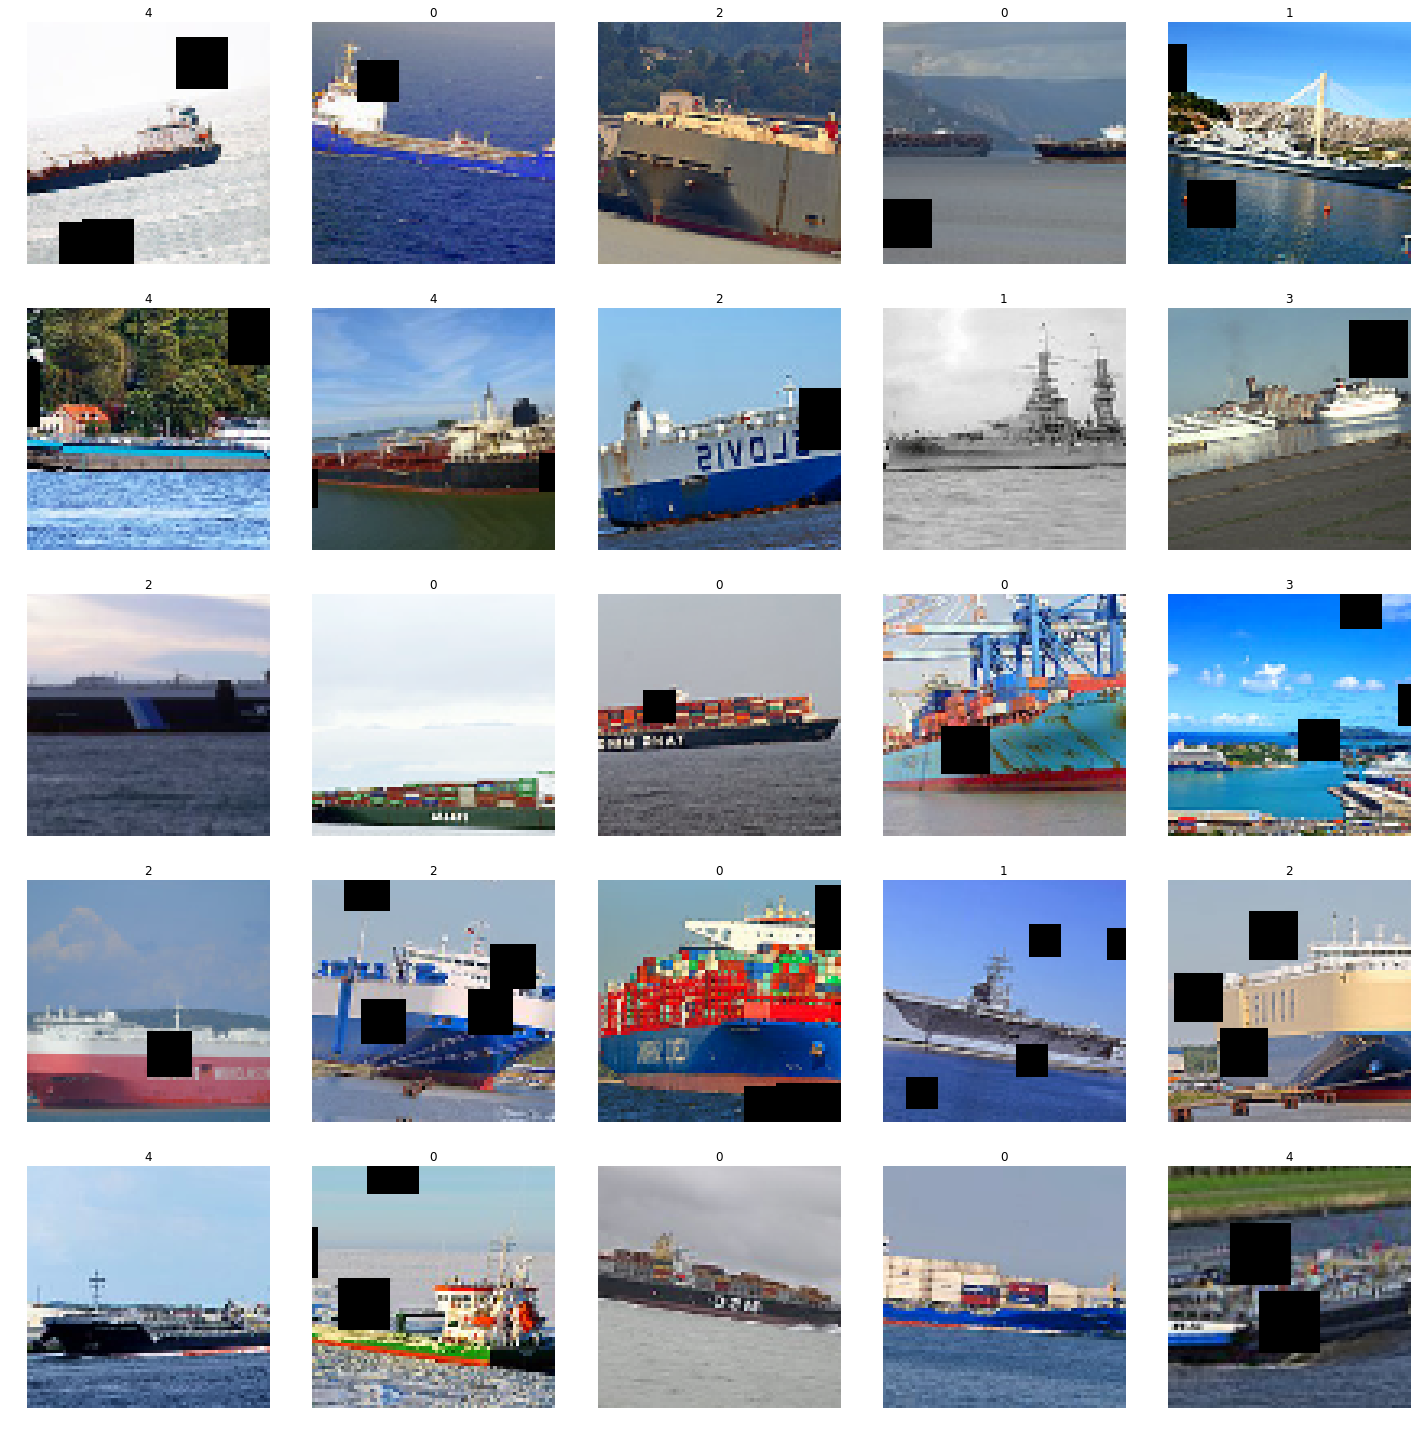

In [31]:
data1.show_batch()

In [32]:
learn1 = cnn_learner(data1, models.resnet50, metrics=[accuracy])

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:03<00:00, 26456256.14it/s]


In [33]:
learn1.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


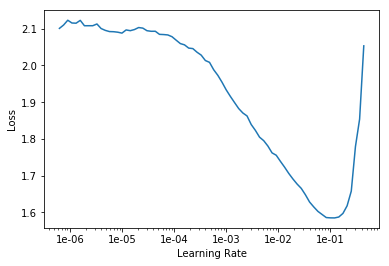

In [34]:
learn1.recorder.plot()

In [0]:
rn50_stage1_callbacks = [CSVLogger(learn=learn1, filename='rn50-stage1-history'), ShowGraph(learn=learn1)]

epoch,train_loss,valid_loss,accuracy,time
0,1.273141,1.140928,0.668000,00:40
1,1.136917,0.977901,0.697600,00:38
2,0.919127,0.603420,0.774400,00:38
3,0.723222,0.478565,0.816000,00:39
4,0.598672,0.479284,0.823200,00:38


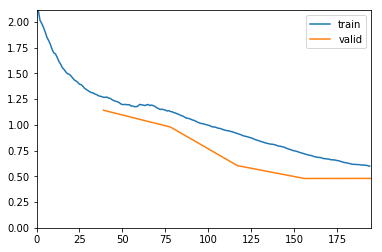

In [36]:

lr = (1e-1)
learn1.fit_one_cycle(5, slice(lr), callbacks=rn50_stage1_callbacks)

In [0]:
learn1.save('rn50-stage1')

In [0]:
learn1.unfreeze()

In [39]:
learn1.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


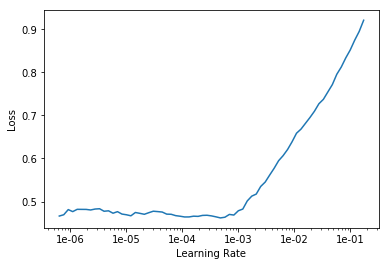

In [40]:
learn1.recorder.plot()

In [0]:
rn50_stage2_callbacks = [CSVLogger(learn=learn1, filename='rn50-stage2-history'),ShowGraph(learn=learn1)]

epoch,train_loss,valid_loss,accuracy,time
0,0.401785,0.353644,0.858400,00:40
1,0.356541,0.345118,0.866400,00:40
2,0.326386,0.300151,0.888000,00:40
3,0.288006,0.299978,0.888000,00:39
4,0.268271,0.296604,0.891200,00:39


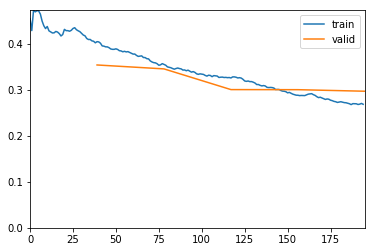

In [43]:
learn1.fit_one_cycle(5, slice(1e-3), callbacks=rn50_stage2_callbacks)

In [0]:
learn1.save('rn50-stage2')

In [0]:
interp = ClassificationInterpretation.from_learner(learn1)

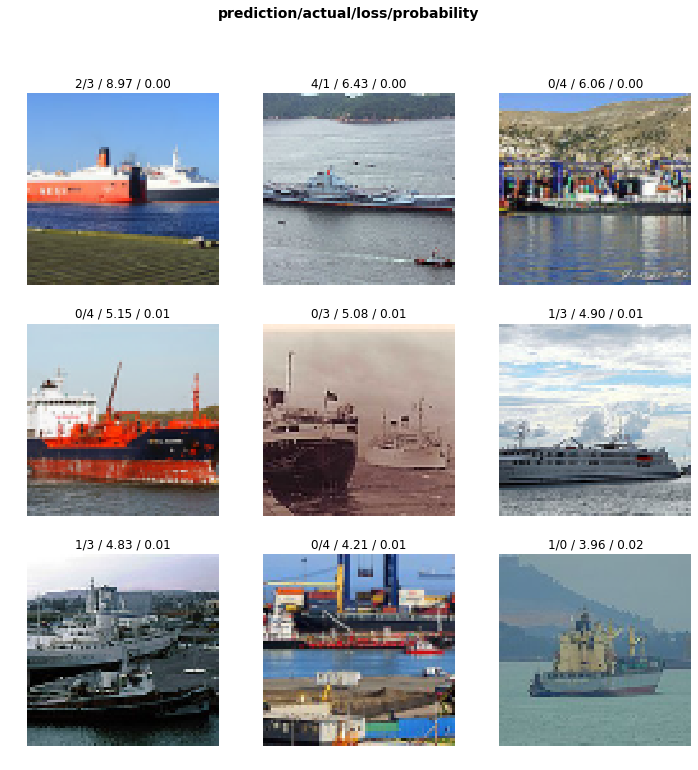

In [47]:
interp.plot_top_losses(9, heatmap=True)

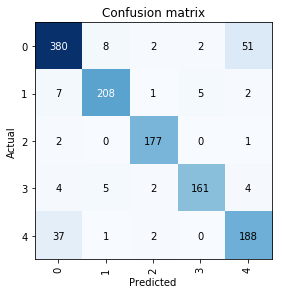

In [48]:
interp.plot_confusion_matrix()

In [0]:
test_img_names = [Path(i).name for i in learn1.data.test_ds.x.items]

In [53]:
test_preds_tta = learn1.TTA(ds_type=DatasetType.Test)

In [0]:
test_preds = learn1.get_preds(ds_type=DatasetType.Test)

In [0]:
test_probs_tta_df = pd.DataFrame(test_preds_tta[0].numpy(), columns=learn1.data.train_ds.classes)
#test_probs_tta_df['image'] = test_img_names

In [61]:
test_probs_tta_df.head()

,0,1,2,3,4
0,0.001488,0.002993,0.000531,0.993535,0.001453
1,0.005930,0.004010,0.000406,0.989119,0.000534
2,0.031313,0.009208,0.001555,0.953885,0.004039
3,0.020126,0.968661,0.000592,0.005684,0.004936
4,0.221711,0.033916,0.087899,0.637980,0.018494


In [0]:
prediction = np.argmax(test_preds_tta[0].numpy(), axis=1)

In [64]:
prediction

array([3, 3, 3, 1, ..., 3, 3, 3, 0])

In [65]:
predictionUpd = prediction + 1
collections.Counter(predictionUpd)

Counter({1: 971, 2: 488, 3: 395, 4: 358, 5: 468})

In [0]:
pred_6 = pd.DataFrame(predictionUpd, columns=['category'])
pred_6 = pred_6.set_index(test['image'])

pred_6.to_csv('./GameOfDL/Submissions/submission6.csv',sep=',',index =True)

In [0]:
rn50_stage3_callbacks = [CSVLogger(learn=learn1, filename='rn50-stage3-history'),ShowGraph(learn=learn1)]

epoch,train_loss,valid_loss,accuracy,time
0,0.245532,0.305692,0.890400,00:40
1,0.237830,0.298844,0.896000,00:41
2,0.240455,0.296682,0.892800,00:40
3,0.237777,0.298847,0.889600,00:39
4,0.233555,0.308770,0.888800,00:39
5,0.230947,0.303960,0.883200,00:39
6,0.227415,0.307128,0.887200,00:39
7,0.223664,0.315112,0.890400,00:40
8,0.207417,0.325586,0.885600,00:40
9,0.197940,0.298396,0.889600,00:39


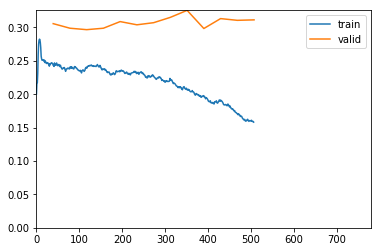

In [0]:
learn1.fit_one_cycle(20, slice(1e-3), callbacks=rn50_stage2_callbacks)